# Matematički softver
## Prvi kolokvij

Ovo je "open book" kolokvij. Dozvoljeno je korištenje bilo kakvih materijala — bilješke s vježbi,
help, tutoriali, postovi na online forumima,... — nastalih _prije_ kolokvija (npr. dozvoljeno je na _StackOverflowu_ naći rješenje nekog zadatka, ali nije dozvoljeno tamo postaviti pitanje kako se rješava neki zadatak).

Također, nije dozvoljena komunikacija (razgovor, _chat_, razmjena bilježaka) među studentima.

Rješenja zadataka pišite u ovu bilježnicu, koju na kraju pošaljite sa Subjectom "MS K1" na veky@math.hr. Rješenje svakog zadatka mora biti samo sebi dovoljno (ponovite `import`e koji vam trebaju), i mora se moći izvršiti bez warninga i grešaka.

Predviđeno vrijeme rješavanja je 90 minuta. Svaki zadatak vrijedi 8 bodova. Maksimalni broj bodova koji se može osvojiti je 40.

### Prvi zadatak

Napišite funkciju `usporedi` koja prima dvije liste, u svakoj od kojih se nalaze samo cijeli brojevi (`int`) i stringovi (`str`). Ako nisu jednake duljine, `usporedi` vraća `False`. Ako jesu, `usporedi` treba ustanoviti jesu li elementi na odgovarajućim pozicijama "slični".

* dva cijela broja su slični ako je jedan od njih (bilo koji) djeljiv onim drugim
* dva stringa su slični ako su jednaki do na veličinu slova (_case insensitive_)
* string i cijeli broj nisu nikada slični

Primjerice, `usporedi([a, b, c], [d, e, f])` treba vratiti `True` ako su `a` i `b` slični, `c` i `d` slični, te `e` i `f` slični.

In [1]:
def usporedi(x,y):
    if(len(x) != len(y)):
        return False;
    for i in range(len(x)):
        if(type(x[i]) != type(y[i])):
            return False;
        if(type(x[i]) == 'int'):
            if( (x[i] % y[i] != 0) and (y[i] % x[i] != 0) ):
                return False;
        if(type(x[i]) == 'str'):
            if(x[i].lower() != y[i].lower()):
                return False;
    return True;

In [2]:
all([
    usporedi([24, 'v'], [12, 'V']) == True,
    usporedi([1, 2], [1]) == False,
    usporedi([1, 't'], ['t', 1]) == False,
    usporedi(['', 0, 'Wäßrig'], ['', 52, 'WÄSSRIG'])
])

True

### Drugi zadatak

U varijabli `kocke` nalazi se tri milijuna rezultata bacanja igraće kocke.

In [3]:
import numpy as np

In [4]:
kocke = 1 + np.random.randint(0, 6, 3_000_000, dtype=np.int8)

#### a)

Interpretirajte `kocke` kao niz pokusa bacanja po četiri kocke (ne kopirajte podatke, samo im promijenite oblik).

Izračunajte, i izrazite u postotcima na dvije decimale, _a posteriori_ vjerojatnost da se u bacanju četiri kocke pojavi bar jedna šestica. Isplati li se kladiti (1:1) na taj događaj? 

In [114]:
import numpy as np
kocke = 1 + np.random.randint(0, 6, 3_000_000, dtype=np.int8)

# dobili smo 4 niza od 750000 random bacanja
kocke = kocke.reshape(4,750_000)

s = 0;
for i in range(750_000):
    if(6 in kocke[:,i]):
        s += 1;
print(s/750_000)

0.516592


Proizlazi da je vjerojatnost dobitka veća za dobivanje šestice.
Stoga se isplati kladiti.

#### b)

Sada reinterpretirajte `kocke` kao niz pokusa, svaki od kojih se sastoji od 24 bacanja 2 kocke (trodimenzionalni tenzor).

Odgovorite na ista pitanja kao u **a)**, za događaj da se u 24 bacanja 2 kocke bar jednom pojavi dvostruka šestica.

In [6]:
import numpy as np
kocke = 1 + np.random.randint(0, 6, 3_000_000, dtype=np.int8)

kocke = kocke.reshape(24,2,62500)

s = 0;
for i in range(62500):
    if([6,6] in kocke[:,0:2,i]):
        s += 1;
print(s/750_000)

0.08332533333333333


Vidimo da se ne isplati kladiti.

### Treći zadatak

U datoteci `bodovi.csv` nalaze se bodovi studenata nekog izmišljenog kolegija. Stupci su redom ime i prezime studenta, bodovi s prvog i drugog kolokvija, te bodovi s tri zadaće.

* Učitajte datoteku u DataFrame.
* Dodajte stupac `Kolokviji` koji predstavlja zbroj bodova na oba kolokvija.
* Dodajte stupac `Zadaće` koji predstavlja ukupan broj bodova na zadaćama. Najslabije napisana zadaća se ne računa.
* Odredite je li bolje (u prosjeku) bio napisan prvi ili drugi kolokvij.
* Ispišite _top 10_ studenata po ukupnim bodovima (kolokviji plus zadaće).

Sve radite u jednom DataFrameu. Smijete dodavati i pomoćne stupce (osim dva gore zadana), ali ih morate obrisati kasnije.

In [152]:
import pandas as pd

bodovi = pd.read_csv('bodovi.csv', header=None, sep='\t')
bodovi['Kolokviji'] = bodovi[2] + bodovi[3]
bodovi['Zadaće'] = bodovi[4]+bodovi[5]+bodovi[6] - bodovi.loc[:, [4, 5, 6]].min(axis=1)
if(bodovi[2].mean() > bodovi[3].mean()):
    print('Prvi kolokvij je napisan bolje.');
else:
    print('Drugi kolokvij je napisan bolje.');
bodovi['Ukupno'] = bodovi['Zadaće'] + bodovi['Kolokviji']
display(bodovi.nlargest(10, 'Ukupno'))
bodovi.drop(['Ukupno'], axis=1)

Drugi kolokvij je napisan bolje.


,0,1,2,3,4,5,6,Kolokviji,Zadaće,Ukupno
410,Eliza,Mora,30,30,0,5,5,60,10,70
599,Mercedes,Boone,30,30,4,5,5,60,10,70
50,Lea,Henry,30,30,5,4,4,60,9,69
170,Leslie,Glass,29,30,5,5,0,59,10,69
204,Makaila,Schaefer,30,30,4,5,2,60,9,69
250,Madilyn,Martinez,30,30,1,5,4,60,9,69
380,Brittany,Kaufman,29,30,0,5,5,59,10,69
450,Ryker,Tate,30,30,4,5,3,60,9,69
603,Joy,Dorsey,30,30,4,5,2,60,9,69
794,Jaidyn,Hensley,30,30,5,1,4,60,9,69


,0,1,2,3,4,5,6,Kolokviji,Zadaće
0,Sierra,Bailey,7,6,4,2,3,13,7
1,Olive,Aguilar,29,30,0,2,2,59,4
2,Sadie,Davila,10,0,1,0,3,10,4
3,Jaylan,Mercer,5,16,3,5,3,21,8
4,Adeline,Gross,1,2,4,5,1,3,9
5,Jazlene,Russell,24,27,2,3,2,51,5
6,Jonathon,Buck,15,15,2,5,4,30,9
7,Claire,Zhang,6,4,5,3,4,10,9
8,Kamila,Perez,18,27,3,4,0,45,7
9,Geovanni,Mcgee,19,19,4,1,4,38,8


,0,1,2,3,4,5,6,sum_2_3
0,Sierra,Bailey,7,6,4,2,3,13
1,Olive,Aguilar,29,30,0,2,2,59
2,Sadie,Davila,10,0,1,0,3,10
3,Jaylan,Mercer,5,16,3,5,3,21
4,Adeline,Gross,1,2,4,5,1,3
5,Jazlene,Russell,24,27,2,3,2,51
6,Jonathon,Buck,15,15,2,5,4,30
7,Claire,Zhang,6,4,5,3,4,10
8,Kamila,Perez,18,27,3,4,0,45
9,Geovanni,Mcgee,19,19,4,1,4,38


### Četvrti zadatak

Nacrtajte, jedan pored drugog sa zajedničkom osi ordinata, grafove funkcijâ $f(x)=1/x$ i $g(x)=1/x^2$ na segmentu $[-1,1]$.

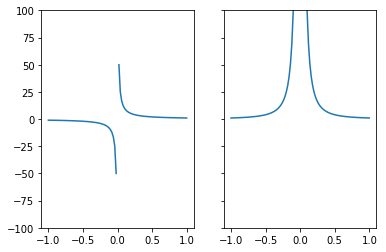

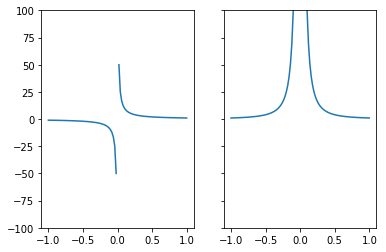

In [189]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# miče "most" tako da uvede dijeljenje s nulom i onda ga zanemari
def f(x):
    with np.errstate(divide='ignore', invalid='ignore'):
        return x**(-1);
def h(x):
    with np.errstate(divide='ignore', invalid='ignore'):
        return x**(-2);
        
fig, (lijevo, desno) = plt.subplots(1, 2, sharey=True)
x = np.linspace(-1, 1, 101)
lijevo.plot(x, f(x))
desno.set_ylim(bottom=-100, top=100)
desno.plot(x, h(x))
fig

### Peti zadatak

Riješite egzaktno diferencijalnu jednadžbu $x\,y\,'+y=x\sin x$ uz početni uvjet $y\left(\frac\pi2\right)=-\frac12$.

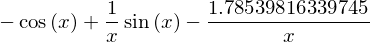

In [190]:
import sympy as sp
sp.init_printing()

y, x = sp.Function('y'), sp.Symbol('x')
difj = sp.Eq(x * sp.Derivative(y(x), x, 1) + y(x), x*sp.sin(x))

sol = sp.dsolve(sp.Eq(x * sp.Derivative(y(x), x, 1) + y(x), x*sp.sin(x))).rhs
constants = sp.solve([sol.subs(x,sp.pi/2)+1/2])
final_answer = sol.subs(constants)
final_answer